https://www.kaggle.com/learn/machine-learning-explainability

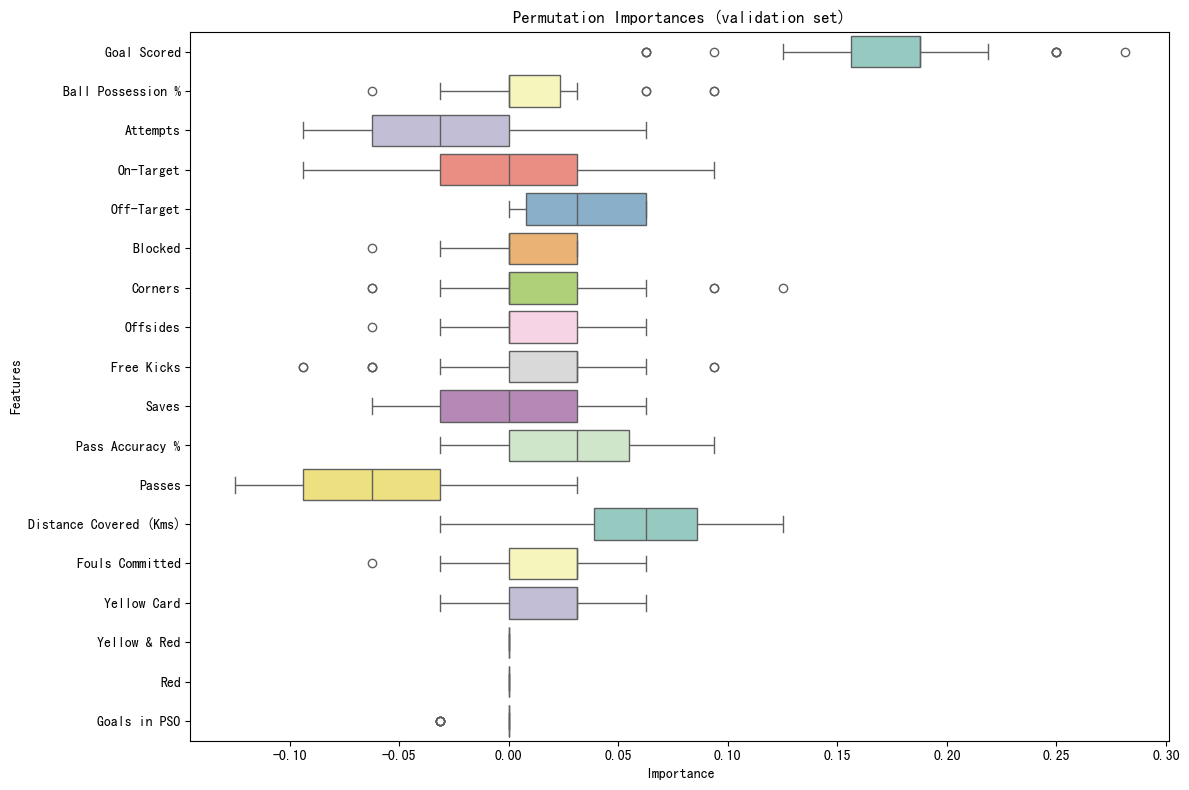

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns

# get data
data = pd.read_csv('./FIFA 2018 Statistics.csv')
y = (data['Man of the Match'] == "Yes")  # Convert from string "Yes"/"No" to binary

feature_names = [i for i in data.columns if data[i].dtype in [np.int64]]
X = data[feature_names]

# separate train and validate set
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# setup model and fit
my_model = RandomForestClassifier(n_estimators=100, random_state=0).fit(train_X, train_y)

# Permutation importance
result = permutation_importance(my_model, val_X, val_y,
                                n_repeats=30,  # Number of times to shuffle each feature
                                random_state=0)

# Preparing data for plotting
importances = pd.DataFrame(result.importances.T, columns=feature_names)

# Plotting
plt.figure(figsize=(12, 8))
sns.boxplot(data=importances, orient="h", palette="Set3")
plt.title('Permutation Importances (validation set)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()
